In [2]:
!pip install deepface opencv-python-headless numpy matplotlib

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

print("Libraries imported successfully")

26-02-09 16:36:34 - Directory /root/.deepface has been created
26-02-09 16:36:34 - Directory /root/.deepface/weights has been created
Libraries imported successfully


In [4]:
MODEL_NAME = "ArcFace"

print("Loading ArcFace model...")
model = DeepFace.build_model(MODEL_NAME)
print("ArcFace model loaded successfully")

Loading ArcFace model...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5


26-02-09 16:37:32 - 🔗 arcface_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5 to /root/.deepface/weights/arcface_weights.h5...


100%|██████████| 137M/137M [00:00<00:00, 340MB/s]


ArcFace model loaded successfully


In [7]:
from google.colab import files

uploaded = files.upload()

Saving pic1.jpg to pic1.jpg
Saving pic2.jpeg to pic2.jpeg


In [9]:
import os
print(os.listdir())

['.config', 'IMG_9584.JPG', 'pic2.jpeg', 'pic1.jpg', 'IMG_9583.JPG', 'sample_data']


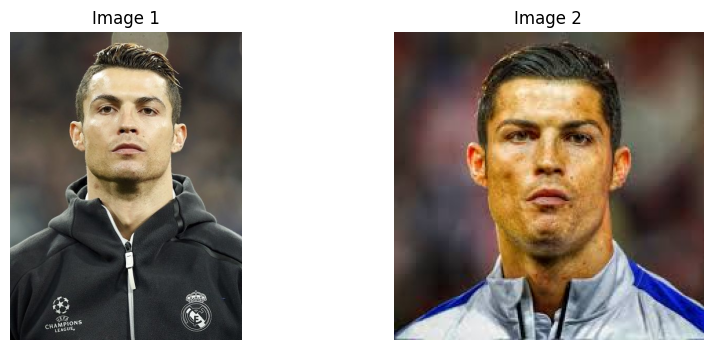

In [10]:
img1_path = "pic1.jpg"
img2_path = "pic2.jpeg"

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("Image 1")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img2)
plt.title("Image 2")
plt.axis("off")

plt.show()

In [17]:
def get_embedding(img_path):

    result = DeepFace.represent(
        img_path=img_path,
        model_name="ArcFace",
        detector_backend="retinaface",
        align=True,
        normalization="ArcFace"
    )

    return np.array(result[0]["embedding"])

In [19]:
embedding1 = get_embedding(img1_path)
embedding2 = get_embedding(img2_path)

print(embedding1.shape)
print(embedding2.shape)

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5


26-02-09 16:47:29 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


100%|██████████| 119M/119M [00:00<00:00, 407MB/s] 


(512,)
(512,)


In [20]:
similarity = np.dot(embedding1, embedding2) / (
    np.linalg.norm(embedding1) * np.linalg.norm(embedding2)
)

print("Cosine Similarity:", similarity)


Cosine Similarity: 0.6092407833882748


In [22]:
similarity_percent = similarity * 100
print(f"Similarity: {similarity_percent:.2f}%")

if similarity_percent >= 75:
    print("MATCH: Same person (High confidence)")
elif similarity_percent >= 60:
    print("LIKELY MATCH: Same person (Moderate confidence)")
elif similarity_percent >= 50:
    print("UNCERTAIN: Cannot confidently verify")
else:
    print("NO MATCH: Different person (High confidence)")


Similarity: 60.92%
LIKELY MATCH: Same person (Moderate confidence)
